# Air Quality: - Explore the Data

In this notebook, you will explore the Bogotá air quality data. The dataset came from the Bogotá Air Quality Monitoring Network [Red de Monitoreo de Calidad del Aire de Bogotá (RMCAB)](http://201.245.192.252:81/home/map). The steps you will complete in this notebook are the following: 

1. Import Python packages
2. Load the data
3. Count null values
4. Plot histograms of different pollutants
5. Make boxplots of pollutants at each measurement station
6. Investigate scatterplots of different pollutants and look for correlation
7. Generate simultaneous scatterplots and histograms across all pollutants
8. Construct a correlation matrix to quantitatively look for correlation
9. Look at measurements over time for different pollutants at different stations
10. Visualize the data in a map representation

## 1. Importar pacotes Python  

Execute a próxima célula para importar os pacotes Python que você usará neste exercício de laboratório. Esta é uma etapa inicial comum sempre que se trabalha com Python. Se tudo correr bem, você deverá ver uma mensagem quando a célula terminar de ser executada, dizendo "Todos os pacotes foram importados com sucesso!".  

Observe a linha `import utils`. Essa linha importa as funções que foram escritas especificamente para este laboratório. Se você quiser ver quais são essas funções, vá em `File -> Open...` e abra o arquivo `utils.py` para dar uma olhada.  

In [1]:
# Import packages
import pandas as pd # package for reading in and manipulating data
from datetime import datetime # package for manipulating dates

import utils # utils functions defined for this lab

print('All packages imported successfully!')

All packages imported successfully!


## 2. Carregar os dados  

Execute a próxima célula para carregar os dados de qualidade do ar de Bogotá.  

1. **Na primeira linha de código**, você usará o pacote `pandas` para ler o arquivo CSV contendo os dados em um *dataframe* chamado `raw_data`. Um *dataframe* é um formato conveniente para acessar e manipular dados tabulares.  
2. **Na segunda linha de código**, você modificará a coluna `DateTime` para um melhor formato.  
3. **Na terceira linha**, você renomeará a coluna `"OZONO"` para `"OZONE"`.  
4. **Na quarta linha**, você criará uma lista com todos os poluentes para uso posterior neste laboratório.  
5. **Na quinta linha de código**, você exibirá o número de linhas no conjunto de dados.  
6. **Na última linha**, você imprimirá as primeiras cinco linhas do *dataframe*.  

In [2]:
# This is a code comment! 
# Code comments always start with a "#" symbol
# You'll see comments throughout the code describing what the code is doing

# Read in the data
raw_data = pd.read_csv('data/RMCAB_air_quality_sensor_data.csv')

# Modify the DateTime column format
raw_data['DateTime'] = pd.to_datetime(utils.fix_dates(raw_data, 'DateTime'), dayfirst=True)

# Rename "OZONO" column from Spanish to English
raw_data = raw_data.rename(columns={'OZONO': 'OZONE'})

# List all of the pollutants that you will be working with
pollutants_list = ['PM2.5', 'PM10',  'NO', 'NO2', 'NOX', 'CO', 'OZONE']

# Print out the number of lines in the dataframe
print(f"The dataset contains {len(raw_data)} entries")

# Print out the first few lines in the dataframe
raw_data.head(5)

The dataset contains 166440 entries


,PM10,PM2.5,NO,NO2,NOX,CO,OZONE,Station,DateTime
0,56.6,32.7,7.504,15.962,23.493,0.44924,2.431,USM,2021-01-01 00:00:00
1,59.3,39.3,16.560,17.866,34.426,0.69832,1.121,USM,2021-01-01 01:00:00
2,96.4,70.8,22.989,17.802,40.791,0.88243,1.172,USM,2021-01-01 02:00:00
3,108.3,81.0,3.704,9.886,13.591,0.29549,6.565,USM,2021-01-01 03:00:00
4,87.7,56.1,2.098,9.272,11.371,0.16621,9.513,USM,2021-01-01 04:00:00


## 3. Contar valores nulos

Um _**valor nulo**_ (null value) é outra forma de se referir a dados faltantes. Execute a célula abaixo para exibir a contagem de valores nulos em cada coluna do conjunto de dados.

In [3]:
# Print out a count of null values for each column in the dataset
raw_data.isnull().sum()

PM10        20014
PM2.5       15312
NO          27664
NO2         27662
NOX         27668
CO          31238
OZONE       32132
Station         0
DateTime        0
dtype: int64

## Iniciando a análise exploratória de dados

## 4. Plote histogramas de diferentes poluentes

Um histograma é uma forma de investigar a distribuição dos seus dados, contando os valores dentro de uma série de intervalos (bins) que cobrem a faixa dos dados. Execute a próxima célula para plotar um histograma de um poluente específico em uma estação sensora específica. Você pode usar os menus suspensos para selecionar diferentes poluentes e diferentes estações. Observe como a distribuição se comporta para um determinado poluente em diferentes estações, assim como as distribuições de diferentes poluentes.

In [4]:
# Define a number of bins to use (feel free to changes this and see what happens!)
number_of_bins=100

# Generate histograms
utils.create_histogram_plot(raw_data, number_of_bins)

interactive(children=(Dropdown(description='Station', options=('USM', 'BOL', 'SUB', 'TUN', 'LFR', 'PTE', 'MAM'…

Visualizar os dados dessa forma da uma ideia da distribuição dos valores. 
É possível ver no gráfico do poluente PM2.5, que ele cobre cerca de 0 a mais de 70 com um pico em torno de concentração 5.
Temos uma distribuição desigual que está inclinada para um valor menor. Que é um bom indicativo.

## 5. Crie boxplots dos poluentes em todas as estações sensoras

Os boxplots são outra forma de investigar a distribuição dos seus dados. Em um boxplot, a faixa de valores dos dados é representada no eixo vertical, e cada "caixa com linhas" (box with whiskers) fornece informações sobre onde está a mediana (o meio da caixa) e os 50% centrais (a altura da caixa) dos seus dados. Valores atípicos, ou pontos de dados que estão muito distantes do padrão geral, também são plotados no eixo vertical. 

Neste caso, há um boxplot para cada estação sensora.

Execute a próxima célula para gerar os boxplots e use o menu suspenso para visualizar as distribuições de diferentes poluentes.

In [5]:
# Generate boxplots of pollutant values for each sensor station
utils.create_boxplot(raw_data)

interactive(children=(Dropdown(description='Pollutant', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOX', 'CO', 'O…

Gráfico de caixa para um determinado poluente, para todas as estações ao mesmo tempo.

- O **eixo vertical** representa os valores de concentração de NO2.
- **Cada caixa** representa os 50% centrais dos dados para cada estação (do primeiro ao terceiro quartil).
- A **linha dentro da caixa** é a mediana, ou seja, o valor central da distribuição.
- As **linhas verticais** que saem da caixa (bigodes) mostram a variação dos dados dentro de um intervalo esperado (normalmente 1,5 vezes o intervalo interquartil).
- Os **círculos** fora dos bigodes são os outliers, ou seja, valores atípicos que estão muito acima do padrão normal da estação.

- Há uma variação na mediana das concentrações de NO2 entre as estações. Por exemplo, a estação 7MA apresenta a menor mediana, enquanto KEN e COL estão ente as mais altas.
- Muitas estações possuem distribuições assimétricas com muitos outliers, o que indica que ocasionalmente ocorrem picos altos de poluição.
- A altura das caixas (variabilidade nos 50% centrais) varia entre as estações. Estações como LFR e CBV mostram uma distribuição mais ampla.
- Embora a distribuição mostre que existem poucas medições com valores altas de concentração (o que é um bom indicativo da qualidade do ar), não teremos muitos dados para treinar esses pontos de alta concentração. Fazendo com que o modelo de aprendizado não seja tão preciso para esses valores de alta concentração.

## 6. Investigue diagramas de dispersão de diferentes poluentes e procure por correlações

Os diagramas de dispersão são úteis para analisar a relação (ou a ausência dela) entre duas variáveis. Execute a célula abaixo para gerar diagramas de dispersão de um poluente em relação a outro. Use os menus suspensos para investigar a relação entre diferentes poluentes. Algum dos poluentes parece estar correlacionado com outro?

As cores no gráfico indicam a concentração dos pontos. Áreas do gráfico que variam do azul para o verde, vermelho e laranja mostram uma densidade crescente de pontos.

In [6]:
# Generate scatterplots of different pollutants against one another
# Different colors show various densities of points on the plot
utils.create_scatterplot(raw_data)

interactive(children=(Dropdown(description='X-Axis', options=('PM2.5', 'PM10', 'NO', 'NO2', 'NOX', 'CO', 'OZON…

Gráficos de dispersão para quaisquer dois poluentes e comparar a distribuição entre si.
Cada ponto mostra o valor de cada um desses dois polunetes para uma medição de sensor feita naquele horário e estação específicos. 

O PM2.5 em relação ao PM10 possuem uma forte correlação positiva.


## 7. Gere diagramas de dispersão e histogramas simultâneos para todos os poluentes

Com as visualizações anteriores, você pôde observar a distribuição dos seus dados e a relação entre diferentes colunas do seu conjunto de dados. Muitas vezes, é útil analisar simultaneamente as distribuições e as relações, e é isso que você verá ao executar a célula abaixo.

Na grade de gráficos que será gerada, você verá cada um dos poluentes listados tanto no eixo vertical quanto no eixo horizontal. Em cada célula da grade, haverá ou um histograma (quando o poluente listado no eixo vertical for o mesmo do eixo horizontal) ou um diagrama de dispersão, mostrando o poluente listado no eixo vertical em relação ao poluente mostrado no eixo horizontal. Essa pode ser uma forma prática de investigar rapidamente as distribuições e as relações entre as colunas de dados.

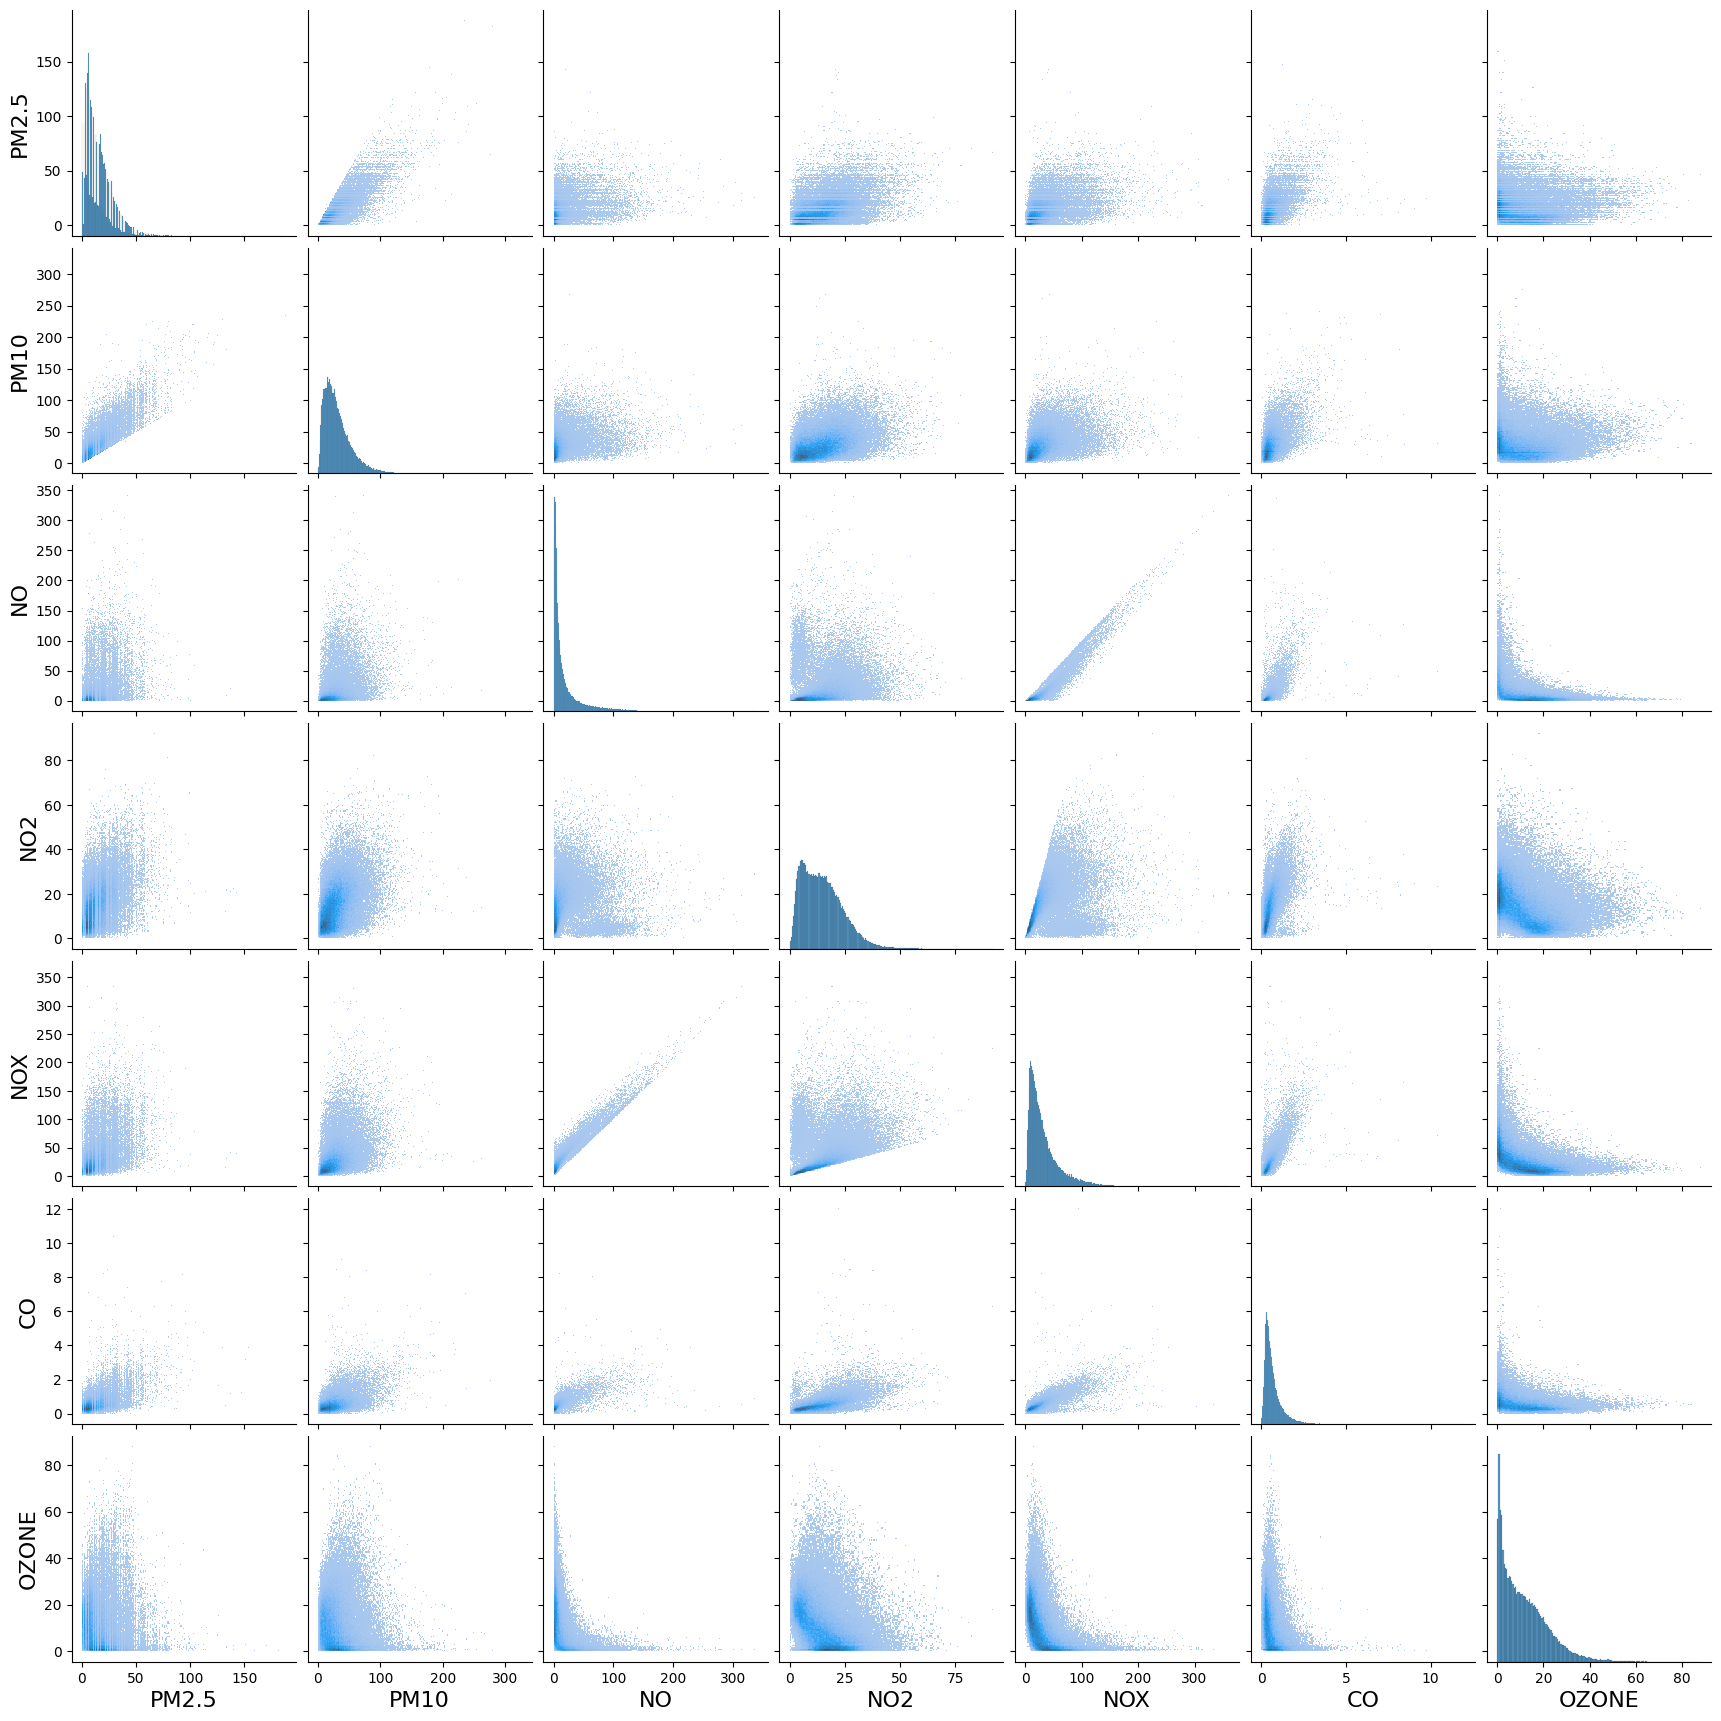

In [30]:
# generate a grid of histograms and scatterplots of your data
utils.plot_pairplot(raw_data, pollutants_list)

## 8. Construa uma matriz de correlação para analisar quantitativamente as correlações

Você pode usar uma matriz de correlação para visualizar como diferentes variáveis se correlacionam entre si. O [coeficiente de correlação de Pearson](https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson) que você calculará abaixo é medido entre -1 e 1. Números mais próximos de 1 ou -1 indicam níveis mais altos de correlação entre duas variáveis, enquanto valores próximos de 0 indicam que não há correlação significativa entre as variáveis. Você pode ignorar os valores 1 ao longo da diagonal, pois eles representam a correlação de cada variável com ela mesma. Você percebe alguma correlação significativa? Como esses valores se comparam com o que você encontrou nos diagramas de dispersão?

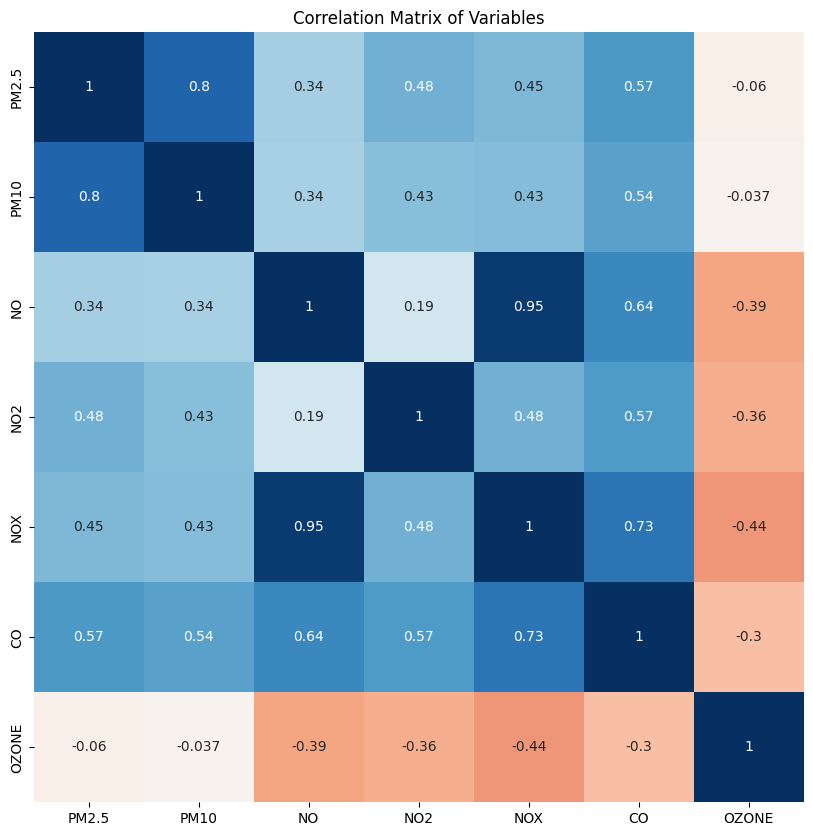

In [31]:
# generate a correlation matrix
utils.create_correlation_matrix(raw_data, pollutants_list)

## 9. Observe as medições ao longo do tempo para diferentes poluentes em diferentes estações

Execute a célula abaixo para gerar um gráfico com os valores dos poluentes ao longo do tempo, conforme medido em uma estação sensora específica. Você pode usar os menus suspensos para escolher diferentes estações e poluentes. Também é possível usar os controles deslizantes para ampliar ou reduzir um intervalo específico de datas. Além disso, você pode editar os valores de `start_date` e `end_date` e executar a célula de código novamente para começar com um intervalo de datas diferente. Explore as medições para diferentes poluentes e diferentes estações.

In [7]:
# define the date range to show in the plot
start_date = datetime(2021, 1, 1)
end_date = datetime(2021, 1, 31)
# generate a time series plot of pollutant data for a paricular station
utils.create_time_series_plot(raw_data, start_date, end_date)

interactive(children=(Dropdown(description='Station', options=('USM', 'BOL', 'SUB', 'TUN', 'LFR', 'PTE', 'MAM'…

## 10. Visualize os dados em uma representação no mapa

Execute a próxima célula para gerar um mapa baseado nas medições de PM2.5 pela cidade de Bogotá. Nele, você verá um círculo no mapa em cada local de estação sensora. Cada círculo é colorido com base na média anual de PM2.5 medida naquele local. Você pode clicar em cada estação sensora para ver um gráfico da média horária (média calculada ao longo do ano para cada hora do dia), além do valor médio de longo prazo e do nível recomendado de PM2.5. 

Se você alterar onde está escrito `hour_of_day` para `day_of_week` no código, verá no gráfico a média diária por dia da semana ao clicar em cada estação. Também é possível trocar o poluente exibido no mapa e nos gráficos, alterando a variável `y_variable` abaixo. 

Dê uma olhada na distribuição das médias de longo prazo por hora do dia e por dia da semana em cada estação e veja o que você descobre!

In [15]:
# add some extra features like latitude and longitude to the data for mapping
enriched_raw_data = utils.add_extra_features(raw_data)

# choose a variable to calculate long-term averages for
x_variable = 'day_of_week' # Options ['day_of_week', 'hour_of_day']
# choose a pollutant which you are interested in
y_variable = 'PM2.5' # Options ['PM2.5', 'PM10', 'NO', 'NO2', 'NOX', 'CO', 'OZONE']

# generate a map representation of the data
utils.create_map_with_plots(enriched_raw_data, x_variable, y_variable)

/home/polia/repos/air-quality/week2/utils.py:322: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_means[index[0]][index[1]] = row[0]
/home/polia/repos/air-quality/week2/utils.py:323: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  grouped_stds[index[0]][index[1]] = row[1]


<Figure size 640x480 with 0 Axes>

As cores dos círculos indicam o valor médio de longo prazo de PM2.5 para cada estação, onde a cor dever indica que a média de longo prazo está abaixo dos 12 microgramas por metro cúbico recomendados pela EPA e pelos EUA.

## **Congratulations on finishing this lab!**

**Keep up the good work :)**